In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

from nltk import word_tokenize 
from nltk.util import ngrams

In [16]:
train=pd.read_csv("Corona_NLP_train.csv",encoding='latin1')
test=pd.read_csv("Corona_NLP_test.csv",encoding='latin1')
df = pd.read_csv("Corona_NLP_all_splits.csv")

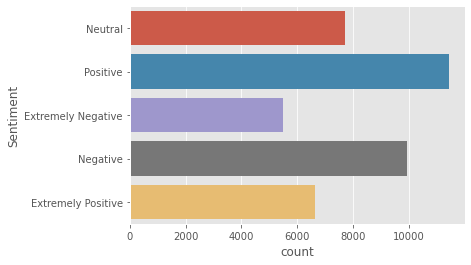

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [18]:
sns.countplot(y=train.Sentiment)
plt.show()
train.head(10)


In [19]:
df.head(10)

,Sentiment,OriginalTweet,split
0,Extremely Negative,CONSUMERS: @EU_Consumer and national authoriti...,train
1,Extremely Negative,So awful that people are having to self isolat...,train
2,Extremely Negative,Did anyone hear in the budget a pledge to help...,train
3,Extremely Negative,Could this #coronavirus crisis be a tipping po...,train
4,Extremely Negative,Cons want to focus on saving corps &amp; busin...,train
5,Extremely Negative,"@BBC_HaveYourSay, I've just received letters f...",train
6,Extremely Negative,As the #coronavirus crisis makes the current m...,train
7,Extremely Negative,New Jersey slaps terror charge on man over all...,train
8,Extremely Negative,"In total, visited 11 shops in #Streatham since...",train
9,Extremely Negative,Q: Have you spoken to RUS and SAU about stoppi...,train


In [4]:
train['text'] = train.OriginalTweet
train["text"] = train["text"].astype(str)

test['text'] = test.OriginalTweet
test["text"] = test["text"].astype(str)


train['label']=train['Sentiment']
test['label']=test['Sentiment']


train.label.value_counts(normalize= True)

Positive              0.277523
Negative              0.240955
Neutral               0.187404
Extremely Positive    0.160945
Extremely Negative    0.133173
Name: label, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

# X = train["text"].tolist()
# y = train["label"].tolist()
X = train["text"]
y = train["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10,
                                                    random_state = 0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (37041,)
Shape of y_train:  (37041,)
Shape of X_test:  (4116,)
Shape of y_test:  (4116,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Naive Bayes
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train_tfidf,y_train)

NB_prediction = naiveByes_clf.predict(X_test_tfidf)
NB_accuracy = accuracy_score(y_test, NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.6497664749871763
Validation accuracy Score :  0.3520408163265306
                    precision    recall  f1-score   support

Extremely Negative       0.02      0.73      0.04        15
Extremely Positive       0.02      0.92      0.04        13
          Negative       0.28      0.43      0.34       642
           Neutral       0.07      0.91      0.14        66
          Positive       0.95      0.32      0.48      3380

          accuracy                           0.35      4116
         macro avg       0.27      0.66      0.21      4116
      weighted avg       0.83      0.35      0.45      4116



In [8]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_tfidf, y_train)

svc_prediction = svc.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction, y_test))

Training accuracy Score    :  0.994303609513782
Validation accuracy Score :  0.5070456754130224
                    precision    recall  f1-score   support

Extremely Negative       0.36      0.64      0.46       291
Extremely Positive       0.45      0.70      0.55       425
          Negative       0.48      0.47      0.48      1019
           Neutral       0.43      0.62      0.51       546
          Positive       0.69      0.43      0.53      1835

          accuracy                           0.51      4116
         macro avg       0.48      0.57      0.50      4116
      weighted avg       0.55      0.51      0.51      4116



In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train_tfidf, y_train)

logreg_prediction = logreg.predict(X_test_tfidf)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.94956939607462
Validation accuracy Score :  0.5150631681243926
                    precision    recall  f1-score   support

Extremely Negative       0.46      0.56      0.50       422
Extremely Positive       0.55      0.58      0.57       629
          Negative       0.48      0.48      0.48      1004
           Neutral       0.47      0.61      0.53       616
          Positive       0.58      0.46      0.51      1445

          accuracy                           0.52      4116
         macro avg       0.51      0.54      0.52      4116
      weighted avg       0.52      0.52      0.51      4116



In [10]:
model_compare = pd.DataFrame({"Naive Bayes":NB_accuracy,                              
                              "Support Vector Machine":svc_accuracy,
                              "Logistic Regression":logreg_accuracy,
                            },index=["accuracy"])

In [11]:
model_compare

,Naive Bayes,Support Vector Machine,Logistic Regression
accuracy,0.352041,0.507046,0.515063


In [12]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(confusion_matrix(y_test, logreg_prediction), annot=True, xticklabels=set(y_train),
#             yticklabels=set(y_train), )
# plt.ylabel('True classes', size=12)
# plt.xlabel('Predicted Classes', size=12)
# plt.show()